
# Decision Trees and Random Forests in Python


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

We'll just check out a simple pairplot for this small dataset.

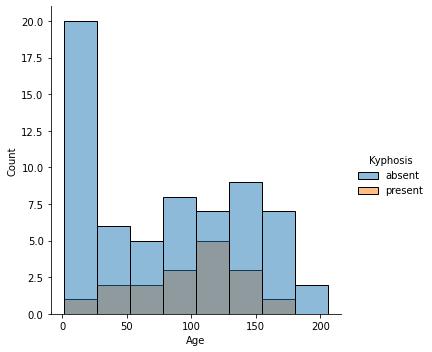

In [5]:
sns.displot(x=df['Age'],hue=df['Kyphosis'])

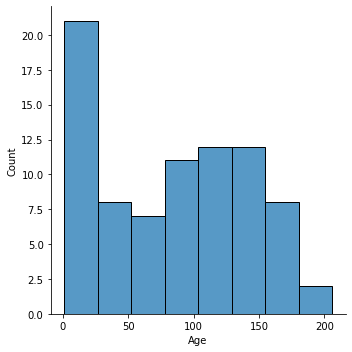

In [6]:
sns.displot(x=df['Age'])

In [8]:
present=df[df['Kyphosis']=='present']

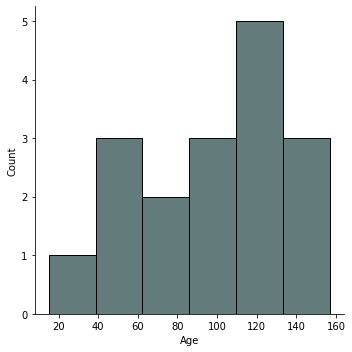

In [9]:
sns.displot(present['Age'],color='DarkSlateGrey')

In [10]:
absent=df[df['Kyphosis']=='absent']

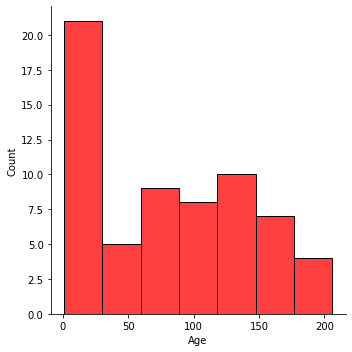

In [11]:
sns.displot(absent['Age'],bins=7,color='red')

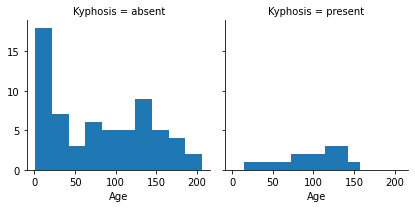

In [12]:
g = sns.FacetGrid(data=df,col='Kyphosis')
g.map(plt.hist,'Age')

## Train Test Split

Let's split up the data into a training set and a test set!

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



In [44]:
print(confusion_matrix(y_test,predictions))

[[17  0]
 [ 5  3]]


In [45]:
len(y_test)

25

In [46]:
sum(y_test=='absent')

17

In [47]:
sum(y_test=='present')

8

## Random Forests

Now let's compare the decision tree model to a random forest.

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
rfc_pred = rfc.predict(X_test)

In [25]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0]
 [ 7  1]]


In [26]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.71      1.00      0.83        17
     present       1.00      0.12      0.22         8

    accuracy                           0.72        25
   macro avg       0.85      0.56      0.53        25
weighted avg       0.80      0.72      0.64        25



## Logistic Regression model

Now let's compare the decision tree model and random forest to Logistic Regression model.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [29]:
predictions = logmodel.predict(X_test)

In [30]:
confusion_matrix(y_test,predictions)

array([[17,  0],
       [ 5,  3]], dtype=int64)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.77      1.00      0.87        17
     present       1.00      0.38      0.55         8

    accuracy                           0.80        25
   macro avg       0.89      0.69      0.71        25
weighted avg       0.85      0.80      0.77        25



# Great Job!